In [1]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier  # Changed to RandomForest
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time
import matplotlib.pyplot as plt

# Load your original flattened data
x_train = np.load('x_train_flat.npy')
x_val = np.load('x_val_flat.npy')
x_test = np.load('x_test_flat.npy')
y_train = np.load('y_train.npy')
y_val = np.load('y_val.npy')
y_test = np.load('y_test.npy')

 Training and Evaluation Function

In [2]:
def train_and_evaluate_rf(x_train, y_train, x_val, y_val, x_test, y_test,
                         max_depth=None, min_samples_split=2):
    """Trains and evaluates a Random Forest model."""

    start_time = time.time()
    model = RandomForestClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42  # For reproducibility
    )
    model.fit(x_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Validation Accuracy
    y_val_pred = model.predict(x_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    return model, accuracy, training_time, classification_report(y_test, y_pred), confusion_matrix(y_test, y_pred), val_accuracy

Hyperparameter Grid

In [3]:
# Define hyperparameter grid
param_grid_rf = {
    'max_depth': [None, 10, 20, 30],  # Adjust these as needed
    'min_samples_split': [2, 5, 10]   # Adjust these as needed
}

Grid Search

In [4]:
# Grid Search for Random Forest
grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=3,  # You can adjust the number of folds
    verbose=2,
    n_jobs=-1  # Use all available cores
)

start_time_grid_search = time.time()
grid_search_rf.fit(x_train, y_train)
grid_search_time = time.time() - start_time_grid_search

print("Best Parameters (Random Forest):", grid_search_rf.best_params_)
best_rf_model = grid_search_rf.best_estimator_
rf_accuracy = accuracy_score(y_test, best_rf_model.predict(x_test))
print("Random Forest Accuracy on Test Set:", rf_accuracy)
print("Grid Search Time:", grid_search_time)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters (Random Forest): {'max_depth': 30, 'min_samples_split': 2}
Random Forest Accuracy on Test Set: 0.8818095238095238
Grid Search Time: 1585.7005603313446


Validation Accuracy

In [5]:
# Evaluate the best Random Forest model on the validation set
y_val_pred_rf = best_rf_model.predict(x_val)
rf_val_accuracy = accuracy_score(y_val, y_val_pred_rf)
print("Random Forest Validation Accuracy:", rf_val_accuracy)

Random Forest Validation Accuracy: 0.8834507712816606


Classification Report and Confusion Matrix

In [6]:
# Detailed Classification Report and Confusion Matrix (Random Forest)
print("\nClassification Report (Random Forest):\n",
      classification_report(y_test, best_rf_model.predict(x_test)))
print("\nConfusion Matrix (Random Forest):\n",
      confusion_matrix(y_test, best_rf_model.predict(x_test)))


Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.80      0.87      0.83      1040
           1       0.99      0.97      0.98      1061
           2       0.80      0.83      0.81      1036
           3       0.89      0.91      0.90      1103
           4       0.77      0.83      0.80       995
           5       0.98      0.95      0.96      1075
           6       0.74      0.59      0.66      1083
           7       0.93      0.94      0.94      1032
           8       0.95      0.98      0.96       993
           9       0.95      0.96      0.95      1082

    accuracy                           0.88     10500
   macro avg       0.88      0.88      0.88     10500
weighted avg       0.88      0.88      0.88     10500


Confusion Matrix (Random Forest):
 [[ 902    0   10   41    7    0   75    0    5    0]
 [   2 1029    5   19    0    1    3    0    2    0]
 [   9    0  859    9   98    0   56    0    5    0]
 [  2

Validation Curve Approximation


--- Validation Curve Approximation ---


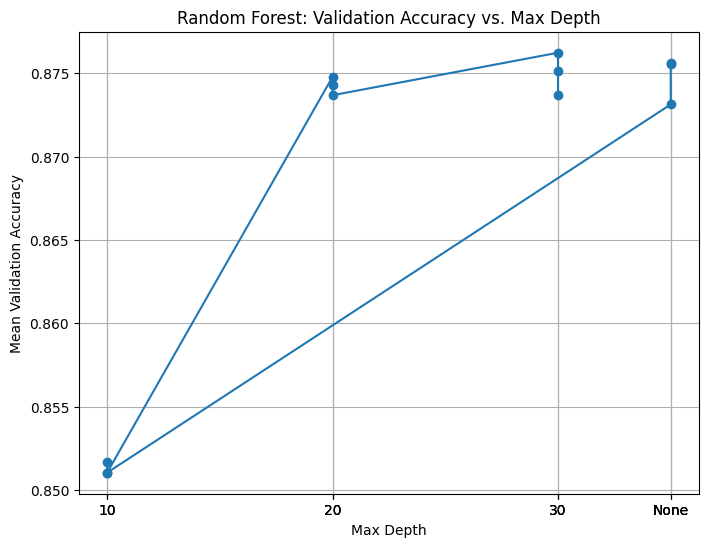

In [7]:
# --- Validation "Curve" Approximation ---
print("\n--- Validation Curve Approximation ---")

#  We'll plot performance vs. max_depth (you could adapt for min_samples_split)

mean_val_scores = grid_search_rf.cv_results_['mean_test_score']
max_depths = grid_search_rf.cv_results_['param_max_depth']  # Corrected line

#  For plotting, we need to handle 'None' in max_depth
max_depths_for_plot = [d if d is not None else max(
    [val for val in max_depths if val is not None]) + 5 for d in max_depths]  # Replace None with a large value

plt.figure(figsize=(8, 6))
plt.plot(max_depths_for_plot, mean_val_scores, marker='o')
plt.xticks(max_depths_for_plot,
           [str(d) for d in max_depths])  # Ensure 'None' is labeled correctly
plt.xlabel("Max Depth")
plt.ylabel("Mean Validation Accuracy")
plt.title("Random Forest: Validation Accuracy vs. Max Depth")
plt.grid(True)
plt.show()